In [174]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [175]:
california = fetch_california_housing()



In [176]:
california.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [177]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [178]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [179]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [180]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [181]:
# preparing the dataset

import pandas as pd

df =pd.DataFrame(california.data, columns = california.feature_names)
df['price'] = california.target

In [182]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [184]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [185]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [186]:
df.shape

(20640, 9)

In [187]:
for col in df.select_dtypes(include='number'):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outliers =  df.index[(df[col] > upper) | (df[col] < lower)]

  df.drop(index = outliers, inplace=True)

df.reset_index(drop=True, inplace=True)


In [188]:
df.shape

(16232, 9)

<Axes: >

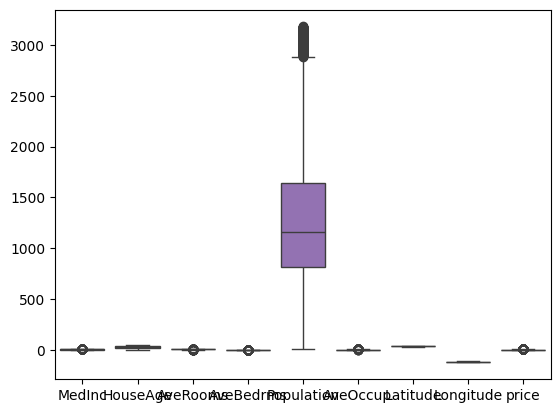

In [189]:
sns.boxplot(df)

In [190]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


<Axes: >

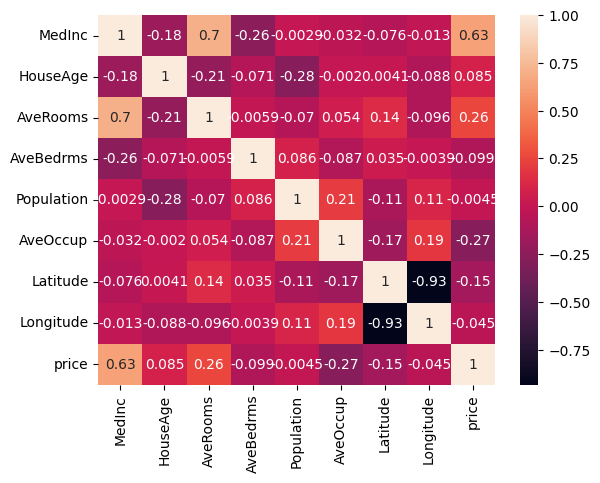

In [191]:
sns.heatmap(df.corr(), annot=True)

In [192]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
3,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
4,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


In [193]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [194]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
2,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25


In [195]:
y.head(2)

,price
0,3.413
1,3.422


In [196]:
X.shape, y.shape

((16232, 8), (16232,))

**Train Test Split**

In [197]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.35, random_state = 43)


In [198]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10550, 8), (5682, 8), (10550,), (5682,))

**Scaling the data**

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [200]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)


LinearRegression()

In [201]:
regressor.coef_

array([ 0.63089646,  0.12979523, -0.12043801,  0.08408132,  0.05309491,
       -0.22942088, -0.84426466, -0.78322326])

In [202]:
regressor.intercept_

np.float64(1.925604927962088)

In [203]:
y_pred_test = regressor.predict(X_test)

In [204]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.30376381382623535
0.4184412640747453
0.5511477241413915


In [205]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
score

0.6433558832495121

**PICKLING**

In [206]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regressor,open('regressor.pkl','wb'))

In [207]:
model_regressor=pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(X_test)

array([0.88362186, 1.4481518 , 1.50621086, ..., 1.39583029, 1.56425663,
       2.09084137])

In [208]:
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [209]:
model_regressor.predict(standard_scaler.transform(X_test))

array([-33.44502829, -31.81672275, -31.83771583, ..., -33.83972297,
       -34.34096962, -33.23813496])